Make sure you write dimesnions using writeDimensions(nx, ny)
2 0.1 40 4


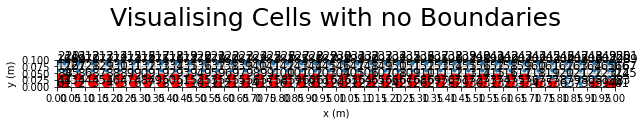

/home/scottlevie/newPythonSolver/python_fv_csm/seperate_notebooks/Background_Functions.ipynb:228: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  "execution_count": 8,


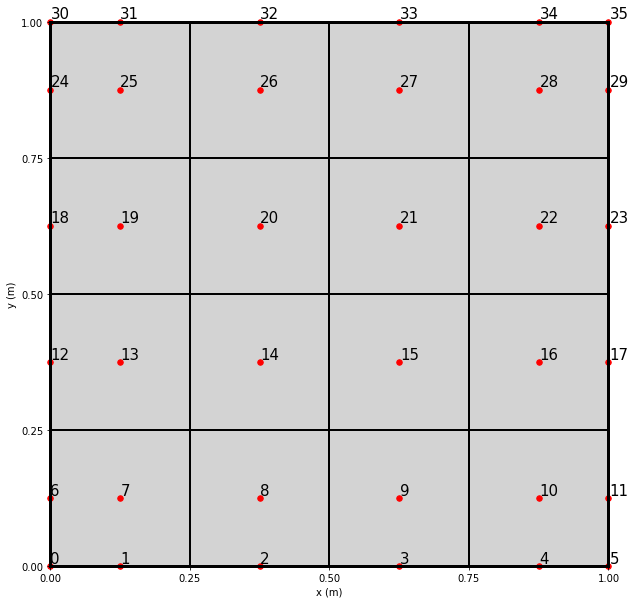

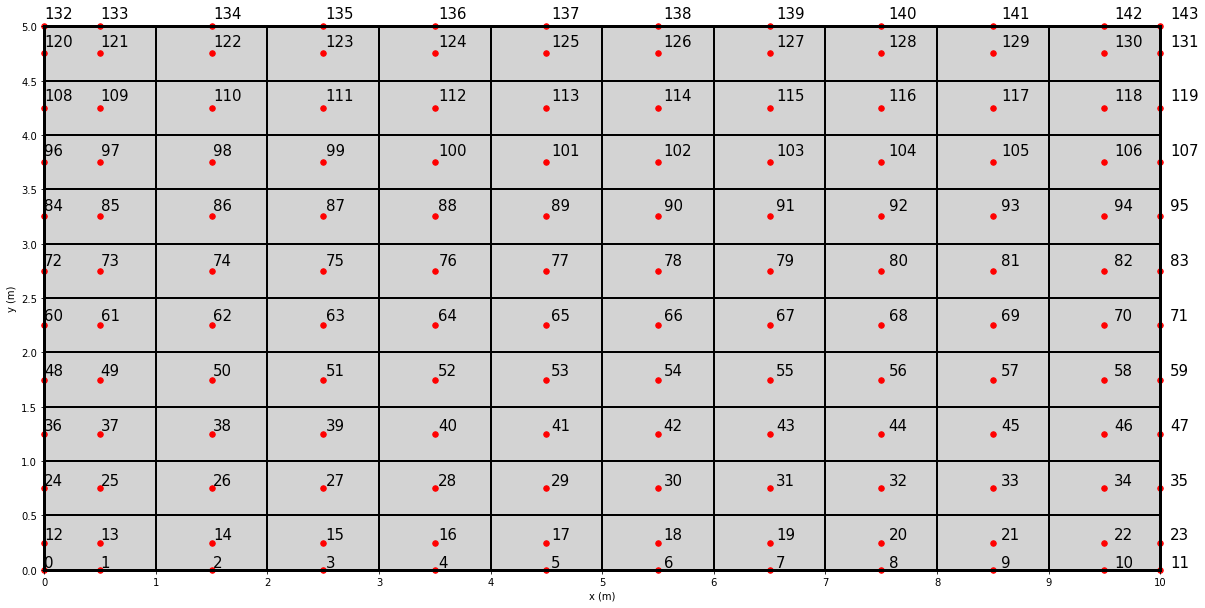

(100, 2)
Number of nodes in Mesh: 100
Number of dimensions: 2
Shear Modulus (mu): 76923076923.07692
Lame Modulus (_lambda): 115384615384.61539
Printing example a-term values for fixed displacement cell on the top boundary:

a_N should be twice the size of a_S
a_E and a_W should be identical

Value for a_N:  307692307692.3077
Value for a_S:  153846153846.15384
Value for a_E:  134615384615.38461
Value for a_W:  134615384615.38461
Value for a_P:  730769230769.2308
Printing a-term values for fixed traction cell on the top boundary:

a_N should 0
a_E and a_W should be identical

Value for a_N:  0
Value for a_S:  153846153846.15384
Value for a_E:  134615384615.38461
Value for a_W:  134615384615.38461
Value for a_P:  423076923076.9231


/home/scottlevie/newPythonSolver/python_fv_csm/seperate_notebooks/_06_Solution_Algorithm.ipynb:329: RuntimeWarning: divide by zero encountered in double_scalars
  ]
/home/scottlevie/newPythonSolver/python_fv_csm/seperate_notebooks/_06_Solution_Algorithm.ipynb:439: RuntimeWarning: divide by zero encountered in double_scalars
  "       [0.00000000e+00, 6.60156250e-11],\n",


Iteration: 0,	 Residual = inf,	 normFactor = 0.00000000000000000000
Iteration: 1,	 Residual = 0.51523940885836416737,	 normFactor = 0.00000048749999999975
Iteration: 2,	 Residual = 20.87325183127153138685,	 normFactor = 0.00000048749999999975
Iteration: 3,	 Residual = 0.25476369375290025543,	 normFactor = 0.00000097499999999926
Iteration: 4,	 Residual = 10.17080655277777090362,	 normFactor = 0.00000097499999999926
Iteration: 5,	 Residual = 0.16833692481888815062,	 normFactor = 0.00000146249999999799
Iteration: 6,	 Residual = 6.64817614566296466450,	 normFactor = 0.00000146249999999799


In [1]:
from ipynb.fs.full.Background_Functions import *
from ipynb.fs.full._06_Solution_Algorithm import *

# Ignore outputs from this cell

# Time Loop
***

But what if the problem case changes with time? We will have to perform the momentum loop for each timestep. 

Firstly we'll discretize time:

In [2]:
tf = 2       # Total time in seconds
dt = 0.1     # Time-step size (s)

# Time array
t = np.array(np.arange(0,tf, dt))

print("Time-step array:")
print(t)

Time-step array:
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9]


Now for each timestep we need to perform the momentum loop. This is called the time loop. We also need to activate the <code>transient</code> setting. 

In [3]:
transient = True

Time Loop Structure:

       for timestep in time:

              reset iteration counter

              momentum loop

              # Update variables   
              U_old_old = U_old
              U_old = U_new
                
                  

In [4]:
# initialise fields
b_x = np.zeros([(ny)*(nx),1])
b_y = np.zeros([(ny)*(nx),1])

U_new = initalise_U_field(nx, ny)
U_old = initalise_U_field(nx, ny)
U_old_old = initalise_U_field(nx, ny)

For the below time loop the maximum number of iterations will be capped to 10, this will be changed when trying to solve a problem:

In [5]:
# Time loop

# Define momentum loop tolerance:
tolerance = 1e-6

for time in t:

    print("\nTime = " + str(time))
       
    # Reset iteration counter
    icorr = 1

    # Set number of maximum iterations for convergence    
    # This will be increased in following cells
    maxcorr = 10


    # Create A matrices:
    A_x = A("x").createMatrix()   
    A_y = A("y").createMatrix()   

    # Add boundary conditions to A matrices

    A_x = boundary_conditions_A(A_x, U_previous, U_old, U_old_old, "x")
    A_y = boundary_conditions_A(A_y, U_previous, U_old, U_old_old, "y")

    # Momentum Loop    
    while True:
        
        # Store solution for previous iteration
        U_previous = U_new

        # x-equation
        # Create b matrices
        b_x = boundary_conditions_b(b_x, U_previous, U_old, U_old_old, "x")

        # solve for u
        u = solve(A_x, b_x)
        u = np.array(u)

        # y-equation
        # Create b matrices        
        b_y = boundary_conditions_b(b_y, U_previous, U_old, U_old_old, "y")

        # solve for v
        v = solve(A_y, b_y)
        v = np.array(v)
        
        # Update U_New with new u and v fields
        U_new = np.hstack((u, v))
       
        # Calculate the residual of each iteration        
        normFactor = np.max(U_new)
        residual = math.sqrt(np.mean((U_new - U_previous)**2))/normFactor     

        # print values
        print("Iteration: {:01d},\t Residual = {:.20f},\t normFactor = {:.20f}".format(icorr, residual, normFactor))

        # Convergence check
        if residual < tolerance: break
            
        elif icorr > maxcorr: break            
        
        # Increment iteration counter
        icorr = icorr + 1
    
    # Update displacement temporal fields      
    U_old_old = U_old
    U_old = U_new



Time = 0.0
Iteration: 1,	 Residual = inf,	 normFactor = 0.00000000000000000000


/tmp/ipykernel_26243/639219247.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  residual = math.sqrt(np.mean((U_new - U_previous)**2))/normFactor


Iteration: 2,	 Residual = 0.51523940885836416737,	 normFactor = 0.00000048749999999975
Iteration: 3,	 Residual = 20.87325183127153138685,	 normFactor = 0.00000048749999999975
Iteration: 4,	 Residual = 0.25476369375290025543,	 normFactor = 0.00000097499999999926
Iteration: 5,	 Residual = 10.17080655277777090362,	 normFactor = 0.00000097499999999926
Iteration: 6,	 Residual = 0.16833692481888815062,	 normFactor = 0.00000146249999999799
Iteration: 7,	 Residual = 6.64817614566296466450,	 normFactor = 0.00000146249999999799
Iteration: 8,	 Residual = 0.12530579722460172265,	 normFactor = 0.00000194999999998712
Iteration: 9,	 Residual = 4.90627686497714154967,	 normFactor = 0.00000194999999998712
Iteration: 10,	 Residual = 0.09958031860184264616,	 normFactor = 0.00000243749999994732
Iteration: 11,	 Residual = 3.87060594856627515625,	 normFactor = 0.00000243749999994732

Time = 0.1
Iteration: 1,	 Residual = 0.08248412283294263847,	 normFactor = 0.00000292499999980293
Iteration: 2,	 Residual = 3

The following updates to the time loop prints convergence progress report graphs, and saves converged displacement $U$ fields to .csv files. (*The coding of these additions are not important to understand.*)

Now let's allow the time loop to come to convergence for the non-transient problem:

In [6]:
# Initialise fields
b_x = np.zeros([(ny)*(nx),1])
b_y = np.zeros([(ny)*(nx),1])

U_new = initalise_U_field(nx, ny)
U_old = initalise_U_field(nx, ny)
U_old_old = initalise_U_field(nx, ny)

In [7]:
transient = False

The maximum timesteps is increased to 100000:


Time = 0


/tmp/ipykernel_26243/4120605417.py:70: RuntimeWarning: divide by zero encountered in double_scalars
  residual = math.sqrt(np.mean((U_new - U_previous)**2))/normFactor


Iteration: 100,	 Residual = 0.00853696685240410216,	 normFactor = 0.00002436491210447264,	 Moving Average = inf,	 Time = 0.00000
Iteration: 200,	 Residual = 0.00381125871261591732,	 normFactor = 0.00004828952280463966,	 Moving Average = 0.09617516741132517422,	 Time = 0.00000
Iteration: 300,	 Residual = 0.00231624652155447593,	 normFactor = 0.00007073359882438827,	 Moving Average = 0.04837032109027063903,	 Time = 0.00000
Iteration: 400,	 Residual = 0.00160122948285275932,	 normFactor = 0.00009116451470347941,	 Moving Average = 0.03085478909492941554,	 Time = 0.00000
Iteration: 500,	 Residual = 0.00118761607387562898,	 normFactor = 0.00010952600411084968,	 Moving Average = 0.02194667280150946684,	 Time = 0.00000


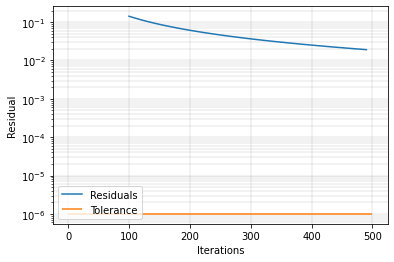

Iteration: 600,	 Residual = 0.00092030793366555262,	 normFactor = 0.00012594325515833142,	 Moving Average = 0.01659273907476005797,	 Time = 0.00000
Iteration: 700,	 Residual = 0.00073461442786095345,	 normFactor = 0.00014059211910936786,	 Moving Average = 0.01303514771492902090,	 Time = 0.00000
Iteration: 800,	 Residual = 0.00059895208643980164,	 normFactor = 0.00015365237734457404,	 Moving Average = 0.01051072213204338329,	 Time = 0.00000
Iteration: 900,	 Residual = 0.00049612207306301147,	 normFactor = 0.00016529248649869421,	 Moving Average = 0.00863570533239917983,	 Time = 0.00000
Iteration: 1000,	 Residual = 0.00041597305557171231,	 normFactor = 0.00017566550579738594,	 Moving Average = 0.00719584412235518747,	 Time = 0.00000


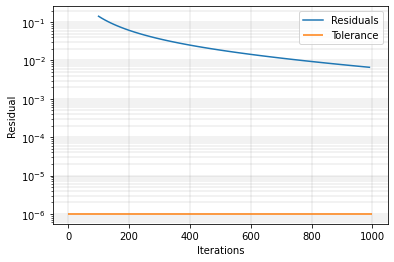

Iteration: 1100,	 Residual = 0.00035213066660025707,	 normFactor = 0.00018490887695063590,	 Moving Average = 0.00606187151186355234,	 Time = 0.00000
Iteration: 1200,	 Residual = 0.00030039106409502356,	 normFactor = 0.00019314544706524049,	 Moving Average = 0.00515103155537388353,	 Time = 0.00000
Iteration: 1300,	 Residual = 0.00025786942697712632,	 normFactor = 0.00020048481596801791,	 Moving Average = 0.00440781821568572534,	 Time = 0.00000
Iteration: 1400,	 Residual = 0.00022251999566973531,	 normFactor = 0.00020702469257943880,	 Moving Average = 0.00379357943277752394,	 Time = 0.00000
Iteration: 1500,	 Residual = 0.00019285148083846558,	 normFactor = 0.00021285215924015798,	 Moving Average = 0.00328055562504590012,	 Time = 0.00000


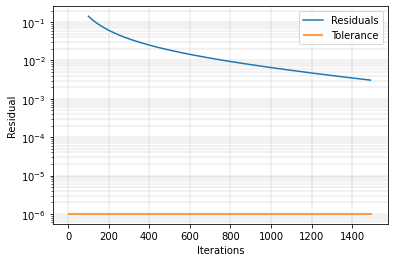

Iteration: 1600,	 Residual = 0.00016775099843090009,	 normFactor = 0.00021804481822493662,	 Moving Average = 0.00284828750286116993,	 Time = 0.00000
Iteration: 1700,	 Residual = 0.00014637114478601457,	 normFactor = 0.00022267182048232983,	 Moving Average = 0.00248136065051211699,	 Time = 0.00000
Iteration: 1800,	 Residual = 0.00012805528607248099,	 normFactor = 0.00022679478485603126,	 Moving Average = 0.00216793942756230047,	 Time = 0.00000
Iteration: 1900,	 Residual = 0.00011228677839968580,	 normFactor = 0.00023046861808078225,	 Moving Average = 0.00189878523232207223,	 Time = 0.00000
Iteration: 2000,	 Residual = 0.00009865362595808492,	 normFactor = 0.00023374224577876876,	 Moving Average = 0.00166658195950178411,	 Time = 0.00000


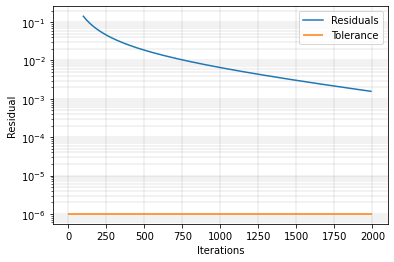

Iteration: 2100,	 Residual = 0.00008682336228004227,	 normFactor = 0.00023665926394179947,	 Moving Average = 0.00146546194054124313,	 Time = 0.00000
Iteration: 2200,	 Residual = 0.00007652485996483405,	 normFactor = 0.00023925851948578770,	 Moving Average = 0.00129066604579320364,	 Time = 0.00000
Iteration: 2300,	 Residual = 0.00006753493417402012,	 normFactor = 0.00024157462757941762,	 Moving Average = 0.00113829558156733628,	 Time = 0.00000
Iteration: 2400,	 Residual = 0.00005966832515177956,	 normFactor = 0.00024363843262263500,	 Moving Average = 0.00100512825067547310,	 Time = 0.00000
Iteration: 2500,	 Residual = 0.00005277010292325333,	 normFactor = 0.00024547741900963327,	 Moving Average = 0.00088847962646526710,	 Time = 0.00000


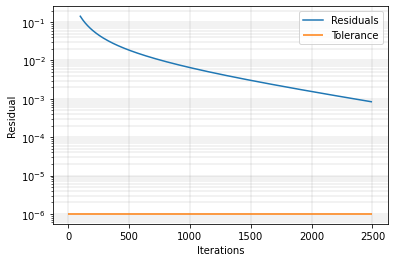

Iteration: 2600,	 Residual = 0.00004670983503656567,	 normFactor = 0.00024711607714887011,	 Moving Average = 0.00078609748745632046,	 Time = 0.00000
Iteration: 2700,	 Residual = 0.00004137705563150163,	 normFactor = 0.00024857622960889139,	 Moving Average = 0.00069608022831444088,	 Time = 0.00000
Iteration: 2800,	 Residual = 0.00003667770746033334,	 normFactor = 0.00024987732173747739,	 Moving Average = 0.00061681315014934231,	 Time = 0.00000
Iteration: 2900,	 Residual = 0.00003253132001898573,	 normFactor = 0.00025103668062214686,	 Moving Average = 0.00054691819367711522,	 Time = 0.00000
Iteration: 3000,	 Residual = 0.00002886875077326948,	 normFactor = 0.00025206974583986237,	 Moving Average = 0.00048521389609230292,	 Time = 0.00000


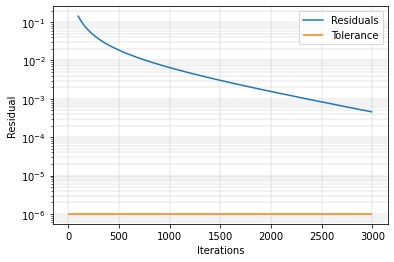

Iteration: 3100,	 Residual = 0.00002563036154709772,	 normFactor = 0.00025299027507230801,	 Moving Average = 0.00043068320666153571,	 Time = 0.00000
Iteration: 3200,	 Residual = 0.00002276453446099967,	 normFactor = 0.00025381052732079319,	 Moving Average = 0.00038244740341461297,	 Time = 0.00000
Iteration: 3300,	 Residual = 0.00002022645519041252,	 normFactor = 0.00025454142616418592,	 Moving Average = 0.00033974479066077573,	 Time = 0.00000
Iteration: 3400,	 Residual = 0.00001797710847582633,	 normFactor = 0.00025519270523119826,	 Moving Average = 0.00030191317564121778,	 Time = 0.00000
Iteration: 3500,	 Residual = 0.00001598244351161982,	 normFactor = 0.00025577303782732742,	 Moving Average = 0.00026837535717840611,	 Time = 0.00000


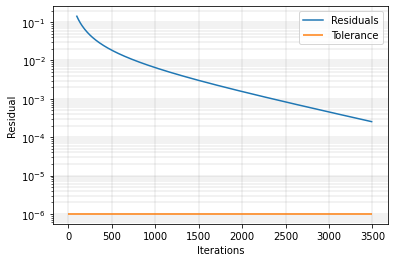

Iteration: 3600,	 Residual = 0.00001421267631695652,	 normFactor = 0.00025629015243910637,	 Moving Average = 0.00023862703359749571,	 Time = 0.00000
Iteration: 3700,	 Residual = 0.00001264170334737267,	 normFactor = 0.00025675093565834424,	 Moving Average = 0.00021222666821314756,	 Time = 0.00000
Iteration: 3800,	 Residual = 0.00001124660608676694,	 normFactor = 0.00025716152389198009,	 Moving Average = 0.00018878694969774675,	 Time = 0.00000
Iteration: 3900,	 Residual = 0.00001000723046874743,	 normFactor = 0.00025752738508368994,	 Moving Average = 0.00016796756050290826,	 Time = 0.00000
Iteration: 4000,	 Residual = 0.00000890582827867948,	 normFactor = 0.00025785339153165286,	 Moving Average = 0.00014946902475239444,	 Time = 0.00000


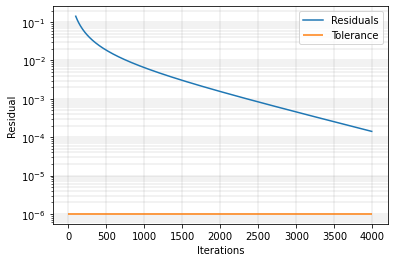

Iteration: 4100,	 Residual = 0.00000792675013132403,	 normFactor = 0.00025814388477442301,	 Moving Average = 0.00013302745220202127,	 Time = 0.00000
Iteration: 4200,	 Residual = 0.00000705618163422933,	 normFactor = 0.00025840273340972300,	 Moving Average = 0.00011841003009843882,	 Time = 0.00000
Iteration: 4300,	 Residual = 0.00000628191588199172,	 normFactor = 0.00025863338461321153,	 Moving Average = 0.00010541114267964553,	 Time = 0.00000
Iteration: 4400,	 Residual = 0.00000559315664472673,	 normFactor = 0.00025883891004527748,	 Moving Average = 0.00009384901981019690,	 Time = 0.00000
Iteration: 4500,	 Residual = 0.00000498034764685949,	 normFactor = 0.00025902204675817288,	 Moving Average = 0.00008356283391450583,	 Time = 0.00000


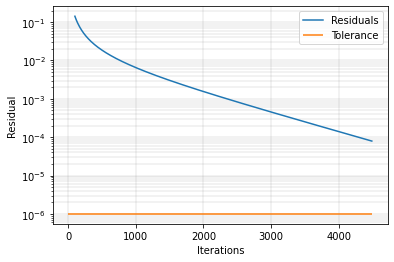

Iteration: 4600,	 Residual = 0.00000443502405544684,	 normFactor = 0.00025918523364590595,	 Moving Average = 0.00007441017826008809,	 Time = 0.00000
Iteration: 4700,	 Residual = 0.00000394968300760454,	 normFactor = 0.00025933064392402559,	 Moving Average = 0.00006626487099433135,	 Time = 0.00000
Iteration: 4800,	 Residual = 0.00000351767046915453,	 normFactor = 0.00025946021407043855,	 Moving Average = 0.00005901503847609701,	 Time = 0.00000
Iteration: 4900,	 Residual = 0.00000313308218312136,	 normFactor = 0.00025957566961526130,	 Moving Average = 0.00005256143889571998,	 Time = 0.00000
Iteration: 5000,	 Residual = 0.00000279067679207289,	 normFactor = 0.00025967854811900207,	 Moving Average = 0.00004681599330209286,	 Time = 0.00000


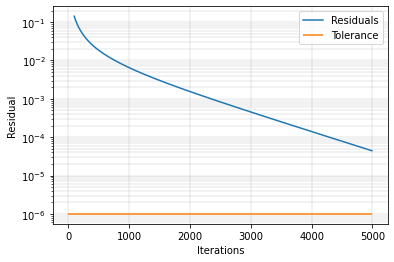

Iteration: 5100,	 Residual = 0.00000248579951203767,	 normFactor = 0.00025977021965016691,	 Moving Average = 0.00004170049615333079,	 Time = 0.00000
Iteration: 5200,	 Residual = 0.00000221431498955720,	 normFactor = 0.00025985190502928992,	 Moving Average = 0.00003714548175768643,	 Time = 0.00000
Iteration: 5300,	 Residual = 0.00000197254814474439,	 normFactor = 0.00025992469208889436,	 Moving Average = 0.00003308922630368245,	 Time = 0.00000
Iteration: 5400,	 Residual = 0.00000175723199656646,	 normFactor = 0.00025998955015885599,	 Moving Average = 0.00002947686819771016,	 Time = 0.00000
Iteration: 5500,	 Residual = 0.00000156546160136346,	 normFactor = 0.00026004734297599641,	 Moving Average = 0.00002625963181600674,	 Time = 0.00000


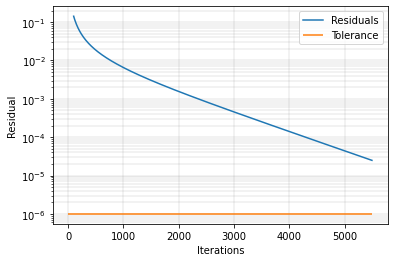

Iteration: 5600,	 Residual = 0.00000139465333472796,	 normFactor = 0.00026009884018696839,	 Moving Average = 0.00002339414177253226,	 Time = 0.00000
Iteration: 5700,	 Residual = 0.00000124250888134998,	 normFactor = 0.00026014472759805355,	 Moving Average = 0.00002084181664324700,	 Time = 0.00000
Iteration: 5800,	 Residual = 0.00000110698335569371,	 normFactor = 0.00026018561630712097,	 Moving Average = 0.00001856833245950186,	 Time = 0.00000

Residuals have converged:

Iteration: 5890,	 Residual = 0.00000099771134428215,	 normFactor = 0.00026021859356451372,	 Moving Average = 0.00001856833245950186,	 Time = 0.00000

Time = 1

Residuals have converged:

Iteration: 2,	 Residual = 0.00000099540988233054,	 normFactor = 0.00026021928821408737,	 Moving Average = 0.00001856833245950186,	 Time = 1.00000
Run time:  198.185085575009


In [8]:
# Time loop

!rm -r Solution
! mkdir Solution

import timeit
start = timeit.default_timer()

# Define momentum loop tolerance:
tolerance = 1e-6

# Only allow one time-step if non transient
if not transient:
    t = np.array([0,1])

for time in t:

    print("\nTime = " + str(round(time, 1)))
    
    # Reset iteration counter
    icorr = 1

    # Set number of maximum iterations for convergence    
    maxcorr = 100000

    # Make directory for timestep
    ! mkdir Solution/{str(round(time, 1))}

    # Initialise arrays for graphs
    residual_array = np.array([])
    moving_average_array = np.array([])
    moving_average_graph_array = np.array([])

    # Create A matrices:
    A_x = A("x").createMatrix()   
    A_y = A("y").createMatrix()   

    # Add boundary conditions to A matrices

    A_x = boundary_conditions_A(A_x, U_previous, U_old, U_old_old, "x")
    A_y = boundary_conditions_A(A_y, U_previous, U_old, U_old_old, "y")

    # Momentum Loop    
    while True:
        
        # Store solution for previous iteration
        U_previous = U_new

        # x-equation
        # Create b matrices
        b_x = boundary_conditions_b(b_x, U_previous, U_old, U_old_old, "x")

        # solve for u
        u = solve(A_x, b_x)
        u = np.array(u)

        # y-equation
        # Create b matrices        
        b_y = boundary_conditions_b(b_y, U_previous, U_old, U_old_old, "y")

        # solve for v
        v = solve(A_y, b_y)
        v = np.array(v)
        
        # Update U_New with new u and v fields
        U_new = np.hstack((u, v))
    
        # Calculate the residual of each iteration        
        normFactor = np.max(U_new)
        residual = math.sqrt(np.mean((U_new - U_previous)**2))/normFactor

        # Append residual array with residual
        residual_array = np.append(residual_array, residual)

        # The following is for on-going convergence reports:
        # Print out residual every 100 iterations
        if icorr%100 == 0 :
            moving_average = np.mean(residual_array[len(residual_array)-100 :len(residual_array) ])
            moving_average_array = np.append(moving_average_array, moving_average)
            print("Iteration: {:01d},\t Residual = {:.20f},\t normFactor = {:.20f},\t Moving Average = {:.20f},\t Time = {:.5f}".format(icorr, residual, normFactor, moving_average, time))

        # Calculate moving average of residual
        if icorr%10 == 0 :
            moving_average_graph = np.mean(residual_array[len(residual_array)-10 :len(residual_array) ])
            moving_average_graph_array = np.append(moving_average_graph_array, moving_average_graph)

        # Print residual progress every 500 iterations
        if icorr % 500 == 0:

            # plt.plot(np.arange(0, len(residual_array)), residual_array, label = "Residuals")
            plt.plot(np.arange(100, len(moving_average_graph_array)*10, 10), moving_average_graph_array[10:len(moving_average_graph_array)], label = "Residuals")
            # plt.scatter((len(moving_average_graph_array)-50)*10, moving_average_graph_array[len(moving_average_graph_array)-50], color = "C1", label  = "Residual 500 iterations ago")
            plt.hlines(tolerance, 0, len(moving_average_graph_array)*10, color = "C1", label  = "Tolerance")
            plt.yscale("log")
            plt.xlabel("Iterations")
            plt.ylabel("Residual")
            plt.legend()
            plt.grid(True, which="both", ls = "-", color = "grey", linewidth = 0.2)
            plt.show()
        

        # Convergence check
        if residual < tolerance:

            print("\nResiduals have converged:\n")            
            print("Iteration: {:01d},\t Residual = {:.20f},\t normFactor = {:.20f},\t Moving Average = {:.20f},\t Time = {:.5f}".format(icorr, residual, normFactor, moving_average, time))

            break
            
        elif icorr > maxcorr:
            
            break            
        
        # Increment iteration counter
        icorr = icorr + 1
    
    # Update displacement temporal fields      
    U_old_old = U_old
    U_old = U_new

    # Save displacement field
    saveArray(str(round(time, 1)) + "/U" , U_new)

stop = timeit.default_timer()

print('Run time: ', stop - start)

As you can see the residuals for the momentum loop converge after approximately 6000 iterations. These results will be analysed in the next notebook.